<a href="https://colab.research.google.com/github/everythingapplejj/JJ-s-Internship-Note/blob/main/Copy_of_read_mcmc_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... canceledERROR: Operation cancelled by user
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
print("Welcome to Graph Embeddings!")

Welcome to Graph Embeddings!


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#testing visualization
#Implementation by Jiwoong Jung
import torch

#placeholder values:
from torch_geometric.datasets import TUDataset

placeholder_dataset = TUDataset(root='.', name='PROTEINS').shuffle()

# Print information about the dataset
print(f'Dataset: {placeholder_dataset.y}')

# Visualization
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})
from torch_geometric.utils import to_networkx
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""

import pandas as pd
import pickle
import numpy as np


#change this to the folder where you store your data
data_dir = ""

#each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
#each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
#each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
#adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
#so each row is of dimension 21*21 = 441


node_labels = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')

adjacency_matrix = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

Processing...
Done!


Dataset: tensor([1, 0, 0,  ..., 0, 0, 0])


In [63]:
import numpy as np
print(node_labels.shape)
print(adjacency_matrix.shape)
print(node_labels)
print(adjacency_matrix)

(20000, 21)
45938
(20000, 441)
[[ 5997 19835   969 ...  4455 27017 27025]
 [41207 22040 41207 ...   135   186   153]
 [13615 16412 16377 ... 41754 41780 41767]
 ...
 [39599  9995 38842 ... 33868 20856 14348]
 [39954  9995 10131 ...  2117  2259  2251]
 [32509 19793 19783 ...  7313 42107 41499]]
[[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [5]:
adjacency_matrix = adjacency_matrix[:,:-1]

In [6]:
print(adjacency_matrix)
print(adjacency_matrix.shape)

[[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
(20000, 441)


In [7]:
testing = []
for graph in adjacency_matrix:
  placeholder = graph
  placeholder = placeholder.reshape(21,21)
  extract = np.where(placeholder == 1)
  testing.append(extract)

In [8]:
print(testing[2020])

(array([ 0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  5,  6,  6,  6,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10, 11, 11, 12, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17,
       18, 18, 18, 19, 19, 19, 20]), array([ 1,  0,  2,  1,  3,  2,  4,  5,  3,  5,  3,  4,  6,  5,  7,  8,  6,
        8,  6,  7,  9, 10, 12,  8, 10, 12,  8,  9, 11, 13, 10, 12,  8,  9,
       11, 13, 10, 12, 14, 15, 13, 15, 13, 14, 16, 18, 15, 17, 19, 16, 18,
       15, 17, 19, 16, 18, 20, 19]))


In [9]:
#next

In [78]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

#where can I consider the node_features?
dataset = []
y = np.array([1])
y = torch.from_numpy(y).type(torch.LongTensor)
print(y)
counter = 0;
for graph in adjacency_matrix:
    sample = graph.reshape(21, 21)
    node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    x = node_indices #testing...
    adj_matrix = sp.coo_matrix(sample)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    #y = torch.from_numpy(node_labels[counter]).type(torch.LongTensor)
    data = Data(x=x, edge_index=edge_index, y = y)
    dataset.append(data)
    counter = counter + 1

dataset = MyCustomDataset(dataset)

# Example: Accessing the first graph in the custom dataset
print(dataset[0])
print("Node feature matrix (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset[0].y)
print(len(dataset))

tensor([1])
Data(x=[21, 1], edge_index=[2, 110], y=[1])
Node feature matrix (x):
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.]])
Edge index:
tensor([[ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,
          9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14,
         14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
         17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
         20, 20],
        [ 1,  2,  0,  2,  0,  1,  3,  2,  4,  3,  5,  7,  9, 11,  4,  6,  8, 10,
      

Processing...
Done!


In [79]:
#testing the visualization of the graph

def graph_visuals(data_input):
  G = to_networkx(dataset[1000], to_undirected=True)

# 3D spring layout
  pos = nx.spring_layout(G, dim=3, seed=0)

# Extract node and edge positions from the layout
  node_xyz = np.array([pos[v] for v in sorted(G)])
  edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
  fig = plt.figure(figsize=(16,16))
  ax = fig.add_subplot(111, projection="3d")

# Suppress tick labels
  for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
      dim.set_ticks([])

# Plot the nodes - alpha is scaled by "depth" automatically
  ax.scatter(*node_xyz.T, s=500, c="#0A047A")

# Plot the edges
  for vizedge in edge_xyz:
      ax.plot(*vizedge.T, color="tab:gray")

# fig.tight_layout()
  plt.show()



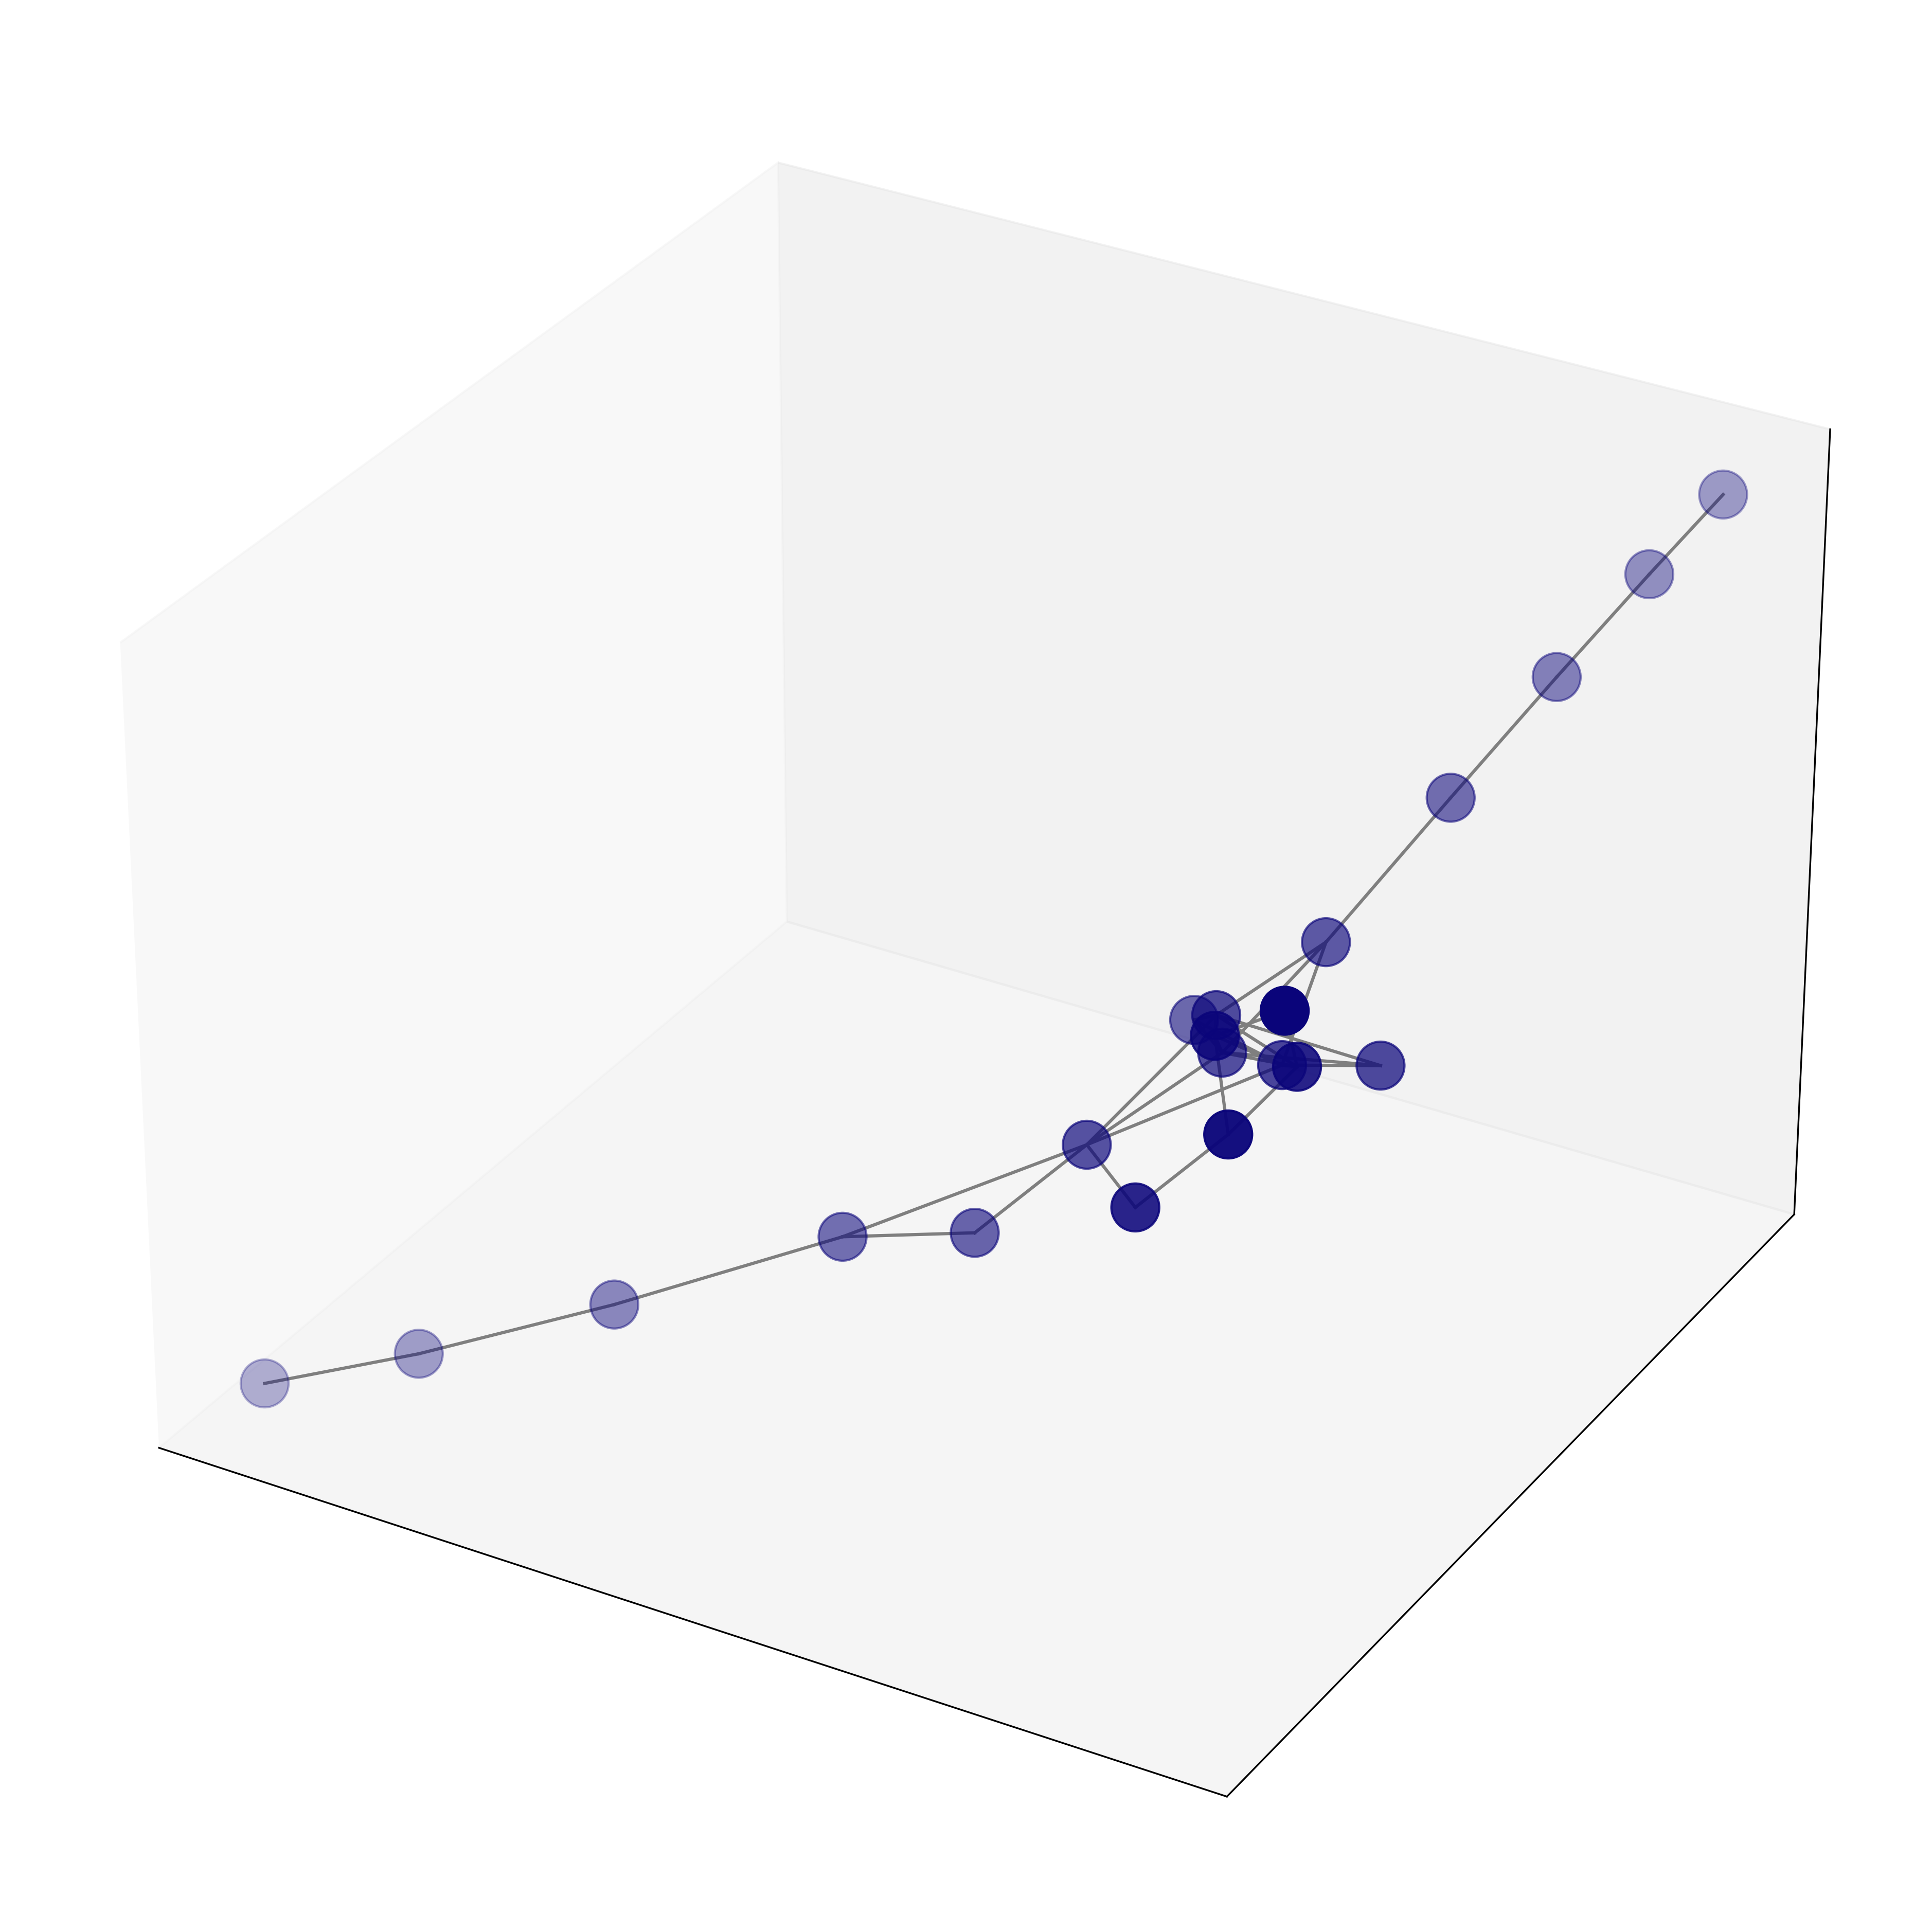

In [80]:
graph_visuals(dataset[2343])

In [90]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
train_dataset = dataset[:int(len(dataset)*0.05)]
val_dataset   = dataset[int(len(dataset)*0.45):int(len(dataset)*0.5)]
test_dataset  = dataset[int(len(dataset)*0.95):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Training set   = 1000 graphs
Validation set = 1000 graphs
Test set       = 1000 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1344, 1], edge_index=[2, 4878], y=[64], batch=[1344], ptr=[65])
 - Subgraph 1: DataBatch(x=[1344, 1], edge_index=[2, 4708], y=[64], batch=[1344], ptr=[65])
 - Subgraph 2: DataBatch(x=[1344, 1], edge_index=[2, 4808], y=[64], batch=[1344], ptr=[65])
 - Subgraph 3: DataBatch(x=[1344, 1], edge_index=[2, 4572], y=[64], batch=[1344], ptr=[65])
 - Subgraph 4: DataBatch(x=[1344, 1], edge_index=[2, 4706], y=[64], batch=[1344], ptr=[65])
 - Subgraph 5: DataBatch(x=[1344, 1], edge_index=[2, 4400], y=[64], batch=[1344], ptr=[65])
 - Subgraph 6: DataBatch(x=[1344, 1], edge_index=[2, 4814], y=[64], batch=[1344], ptr=[65])
 - Subgraph 7: DataBatch(x=[1344, 1], edge_index=[2, 4664], y=[64], batch=[1344], ptr=[65])
 - Subgraph 8: DataBatch(x=[1344, 1], edge_index=[2, 4712], y=[64], batch=[1344], ptr=[65])
 - Subgraph 9: DataBatch(x=[1344, 1], edge_index=[2, 4716], y=[64], ba

In [91]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool


class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        # Graph-level readout
        hG = global_mean_pool(h, batch)

        # Classifier
        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)

        return hG, F.log_softmax(h, dim=1)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

gcn = GCN(dim_h=32)
gin = GIN(dim_h=32)

In [92]:
def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 50

    model.train()
    for epoch in range(epochs+1):
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

    # Print metrics every 10 epochs
    if(epoch % 10 == 0):
        print(f'Epoch {epoch:>3} | Train Loss: {total_loss:.2f} '
              f'| Train Acc: {acc*100:>5.2f}% '
              f'| Val Loss: {val_loss:.2f} '
              f'| Val Acc: {val_acc*100:.2f}%')

    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
      _, out = model(data.x, data.edge_index, data.batch)
      loss += criterion(out, data.y) / len(loader)
      acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin = train(gin, train_loader)

Epoch  50 | Train Loss: 0.00 | Train Acc: 100.00% | Val Loss: 0.00 | Val Acc: 100.00%
Test Loss: 0.00 | Test Acc: 100.00%


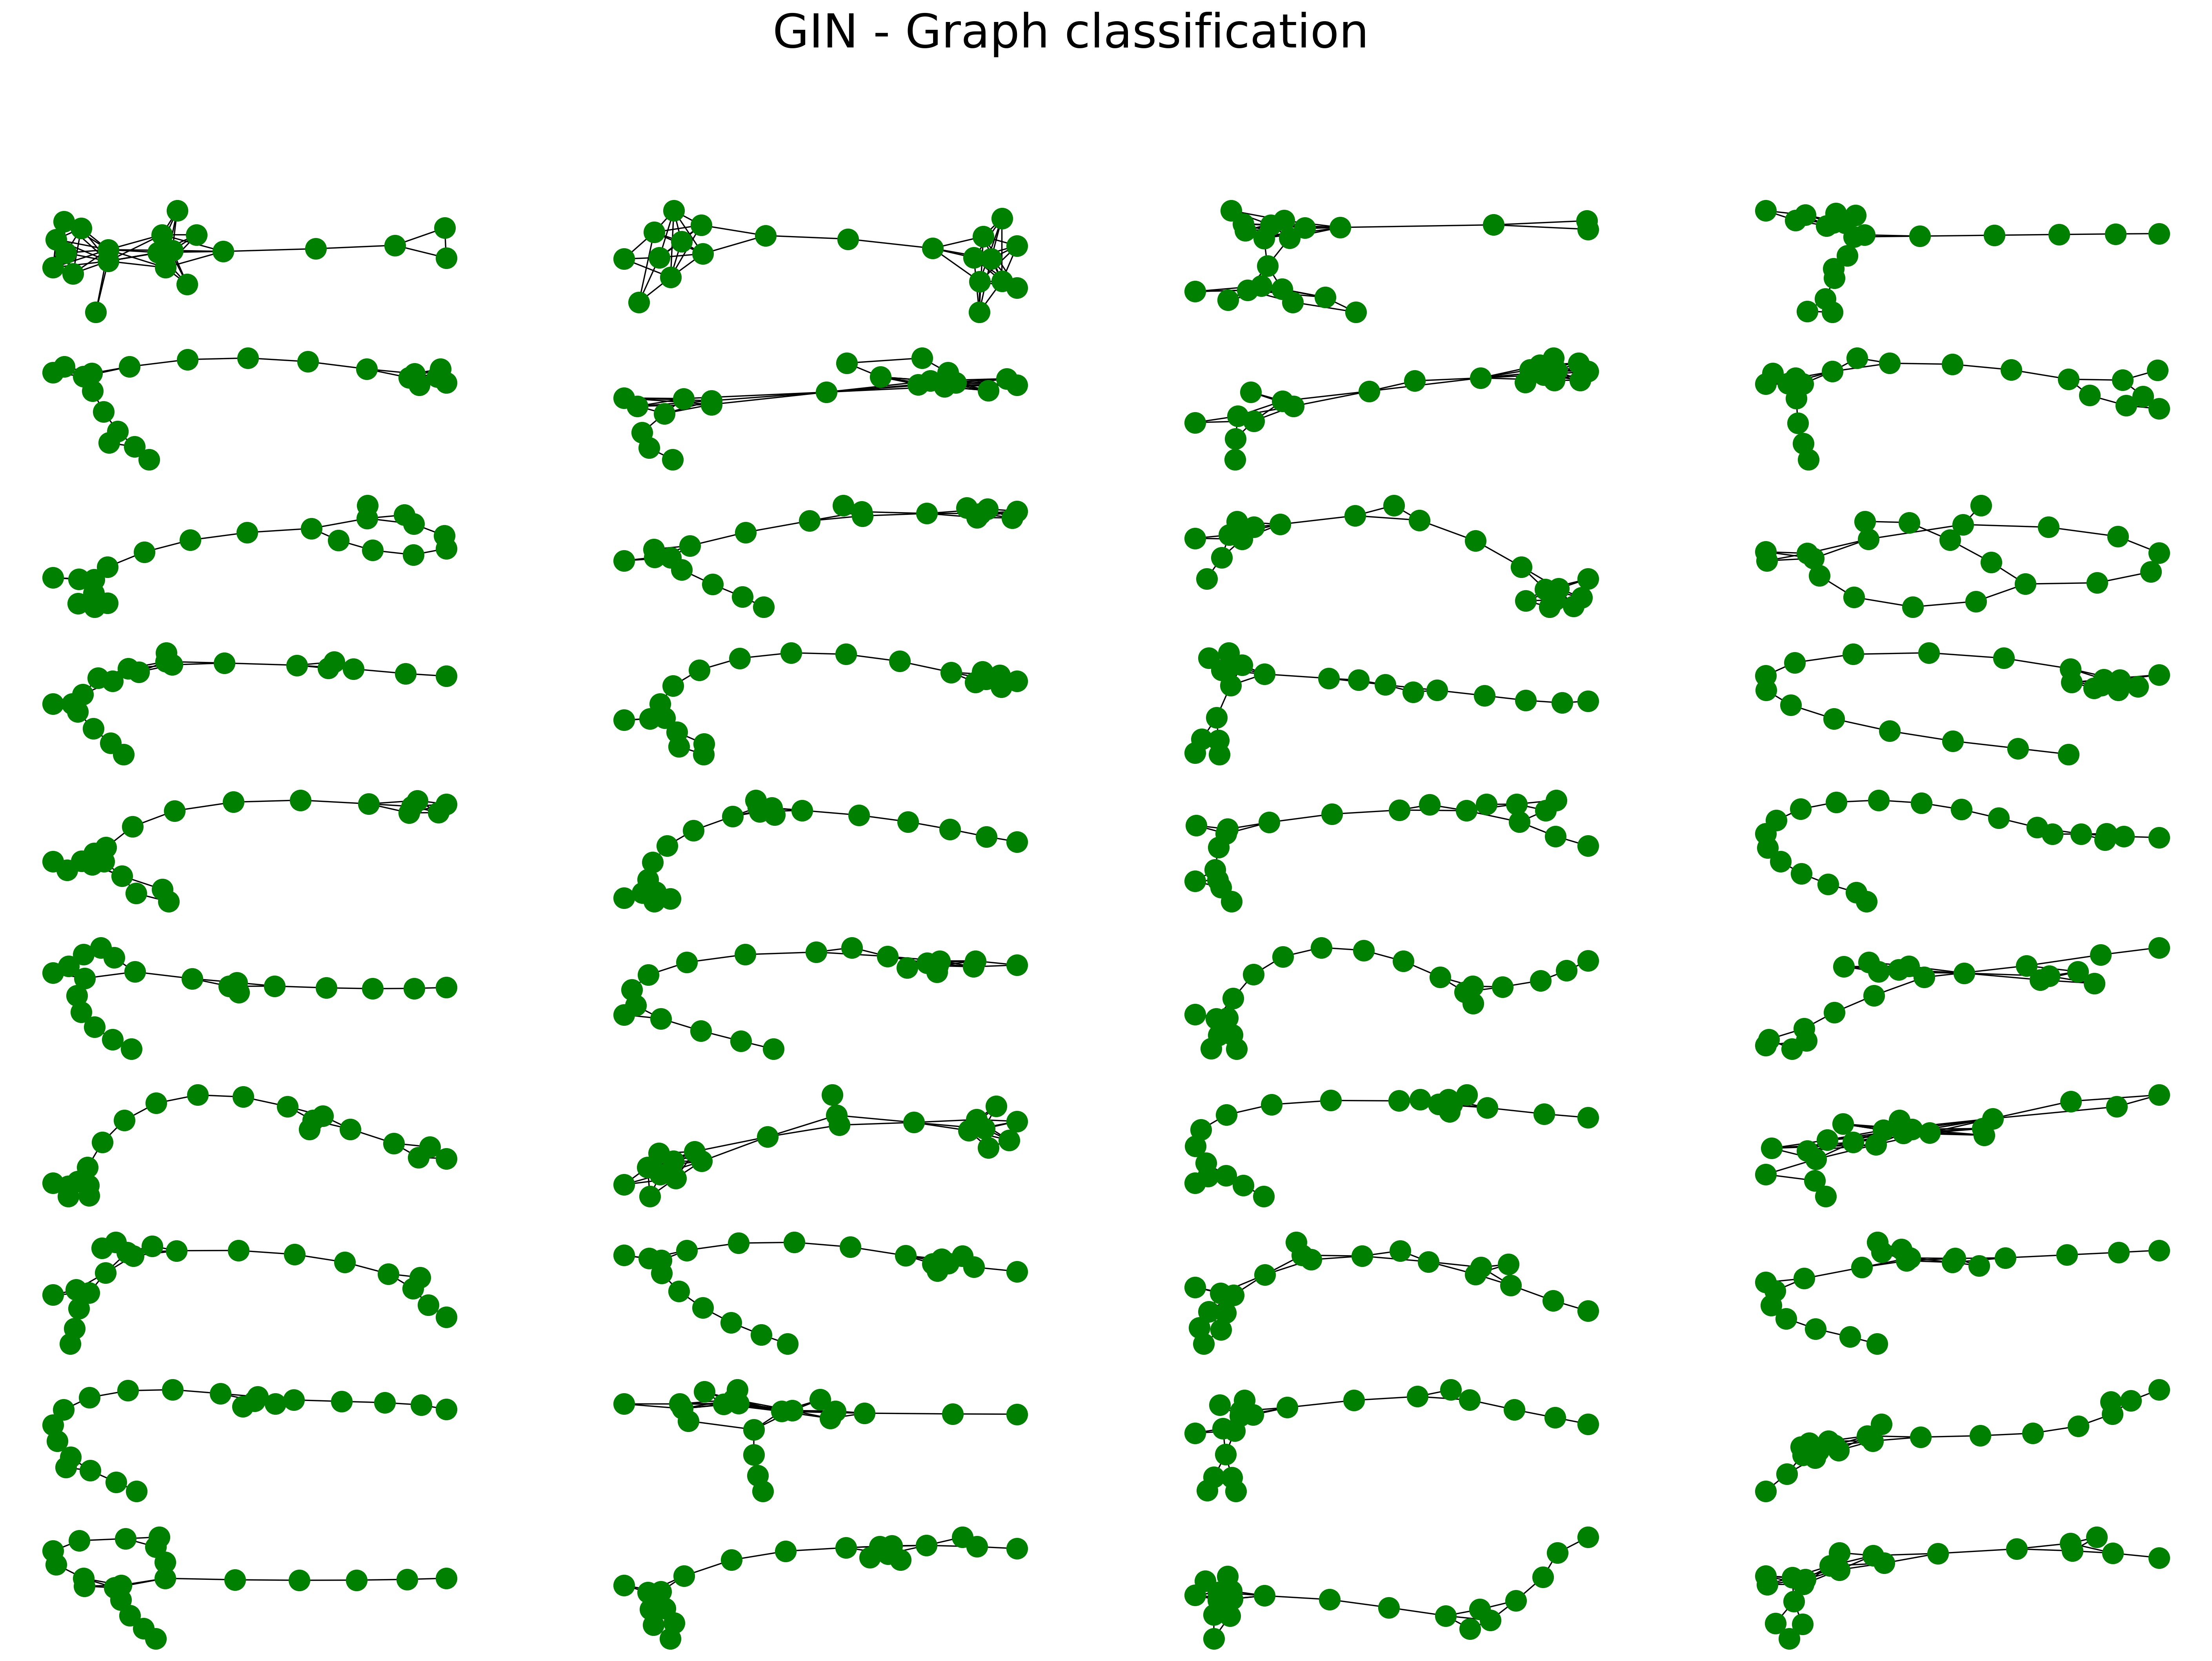

In [96]:
fig, ax = plt.subplots(10, 4, figsize=(24,16))
fig.suptitle('GIN - Graph classification')

for i, data in enumerate(dataset[len(dataset) - 40:]):
    # Calculate color (green if correct, red otherwise)
    _, out = gin(data.x, data.edge_index, data.batch)
    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=150,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

In [85]:
gcn.eval()
gin.eval()
acc_gcn = 0
acc_gin = 0
acc = 0

for data in test_loader:
    # Get classifications
    #_, out_gcn = gcn(data.x, data.edge_index, data.batch)
    _, out_gin = gin(data.x, data.edge_index, data.batch)
    out = out_gin

    # Calculate accuracy scores
    #acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc += accuracy(out.argmax(dim=1), data.y) / len(test_loader)

# Print results
#print(f'GCN accuracy:     {acc_gcn*100:.2f}%')
print(f'GIN accuracy:     {acc_gin*100:.2f}%')
#print(f'GCN+GIN accuracy: {acc*100:.2f}%')

GIN accuracy:     100.00%


In [ ]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]


dataset = []
y = torch.ones_like(placeholder_dataset[0].y.long())

for graph in adjacency_matrix:
    sample = graph.reshape(21, 21)
    node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    x = node_indices
    adj_matrix = sp.coo_matrix(sample)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    data = Data(x=x, edge_index=edge_index, y=torch.tensor(y, dtype=torch.float))
    dataset.append(data)

dataset = MyCustomDataset(dataset)

# Example: Accessing the first graph in the custom dataset
print(dataset[0])
print("Node feature matrix (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset[0].y)
print(len(dataset))

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
from torch_geometric.datasets import TUDataset
# ex) x = [2,1000]
dataset = [] #should not use numpy list
y = np.ones((4,))
for graph in adjacency_matrix:
  sample = graph.reshape(21,21)
  node_indices = torch.arange(sample.shape[0], dtype = torch.float)
  x = torch.cat([node_indices])
  adj_matrix = sp.coo_matrix(sample)
  edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
  data = Data(x = x, edge_index = edge_index,y=y)
  dataset.append(data)
#this is a testing unit